## Historia breve de las CNN's

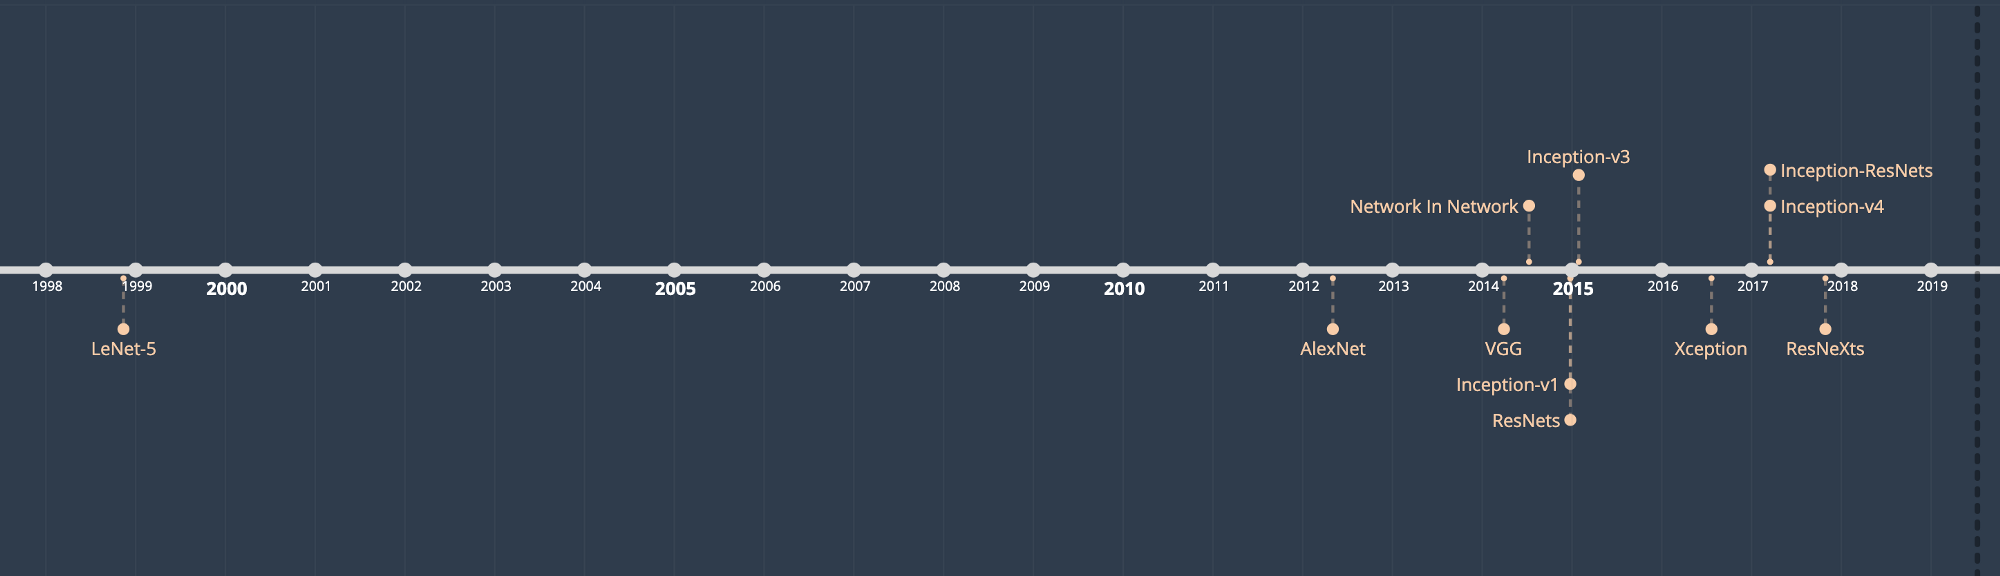

### LeNet-5 (1998)

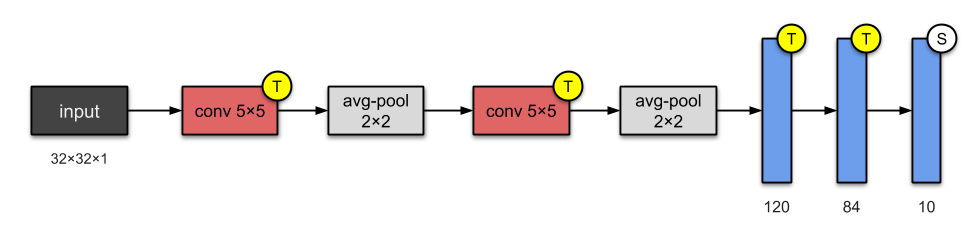

Parámetros: 60000

Novedades:

Esta arquitectura se apilo por primera vez convoluciones con función de activación y agrupar capas, y terminar la red con una o más capas totalmente conectadas.

### AlexNet (2012)

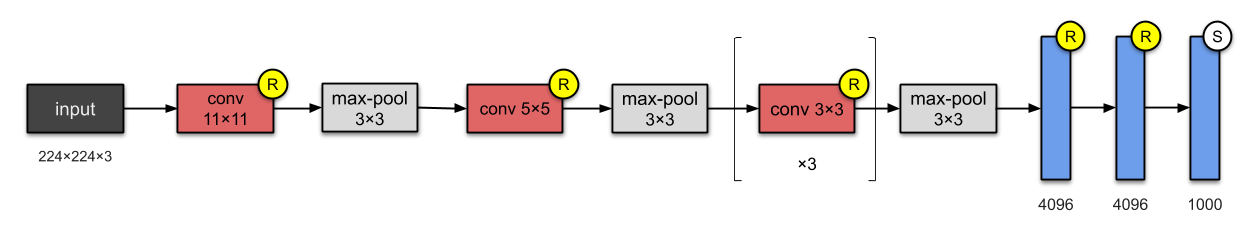

Parámetros 60 millones

Novedades:

Se aplicó ReLUs, Dropout



## VGG-16 (2014)

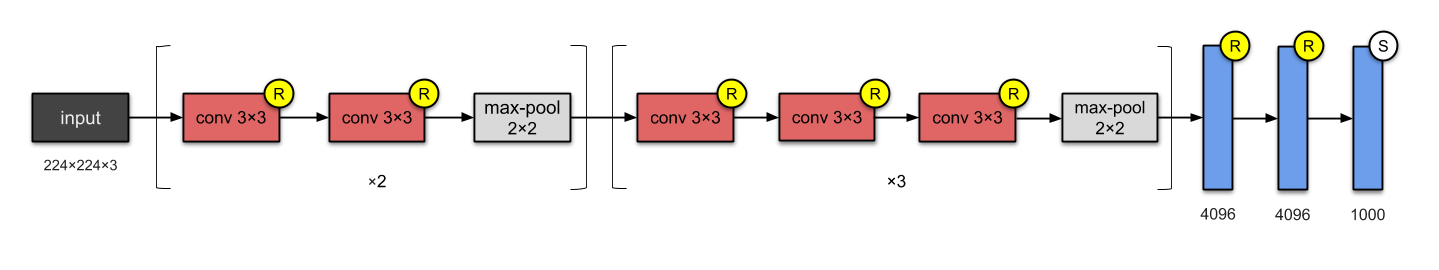

Parámetros: 138 millones.

Novedades: 500MB de peso.

## Inception-v1 (2014)

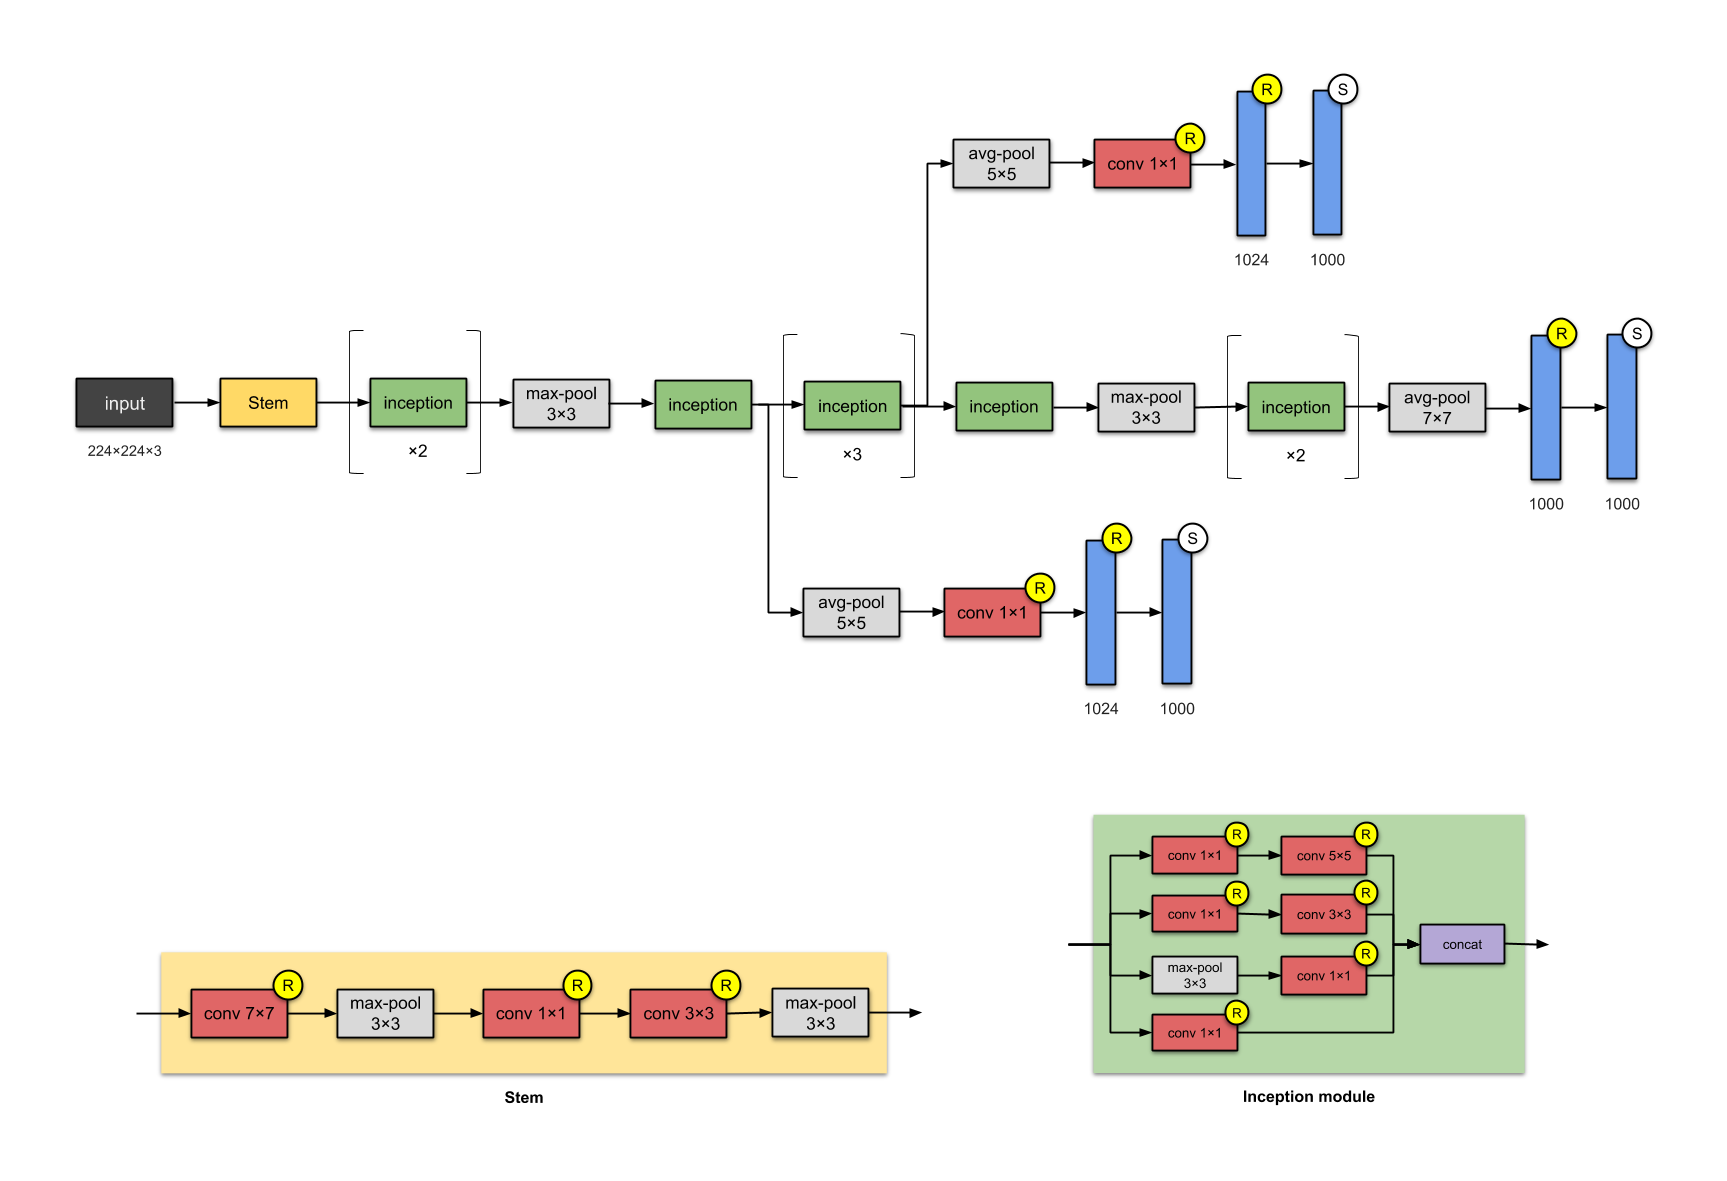

Parámetros: 5 millones.

Novedades: La primera red que usa bloques.

## Inception-v3 (2015)

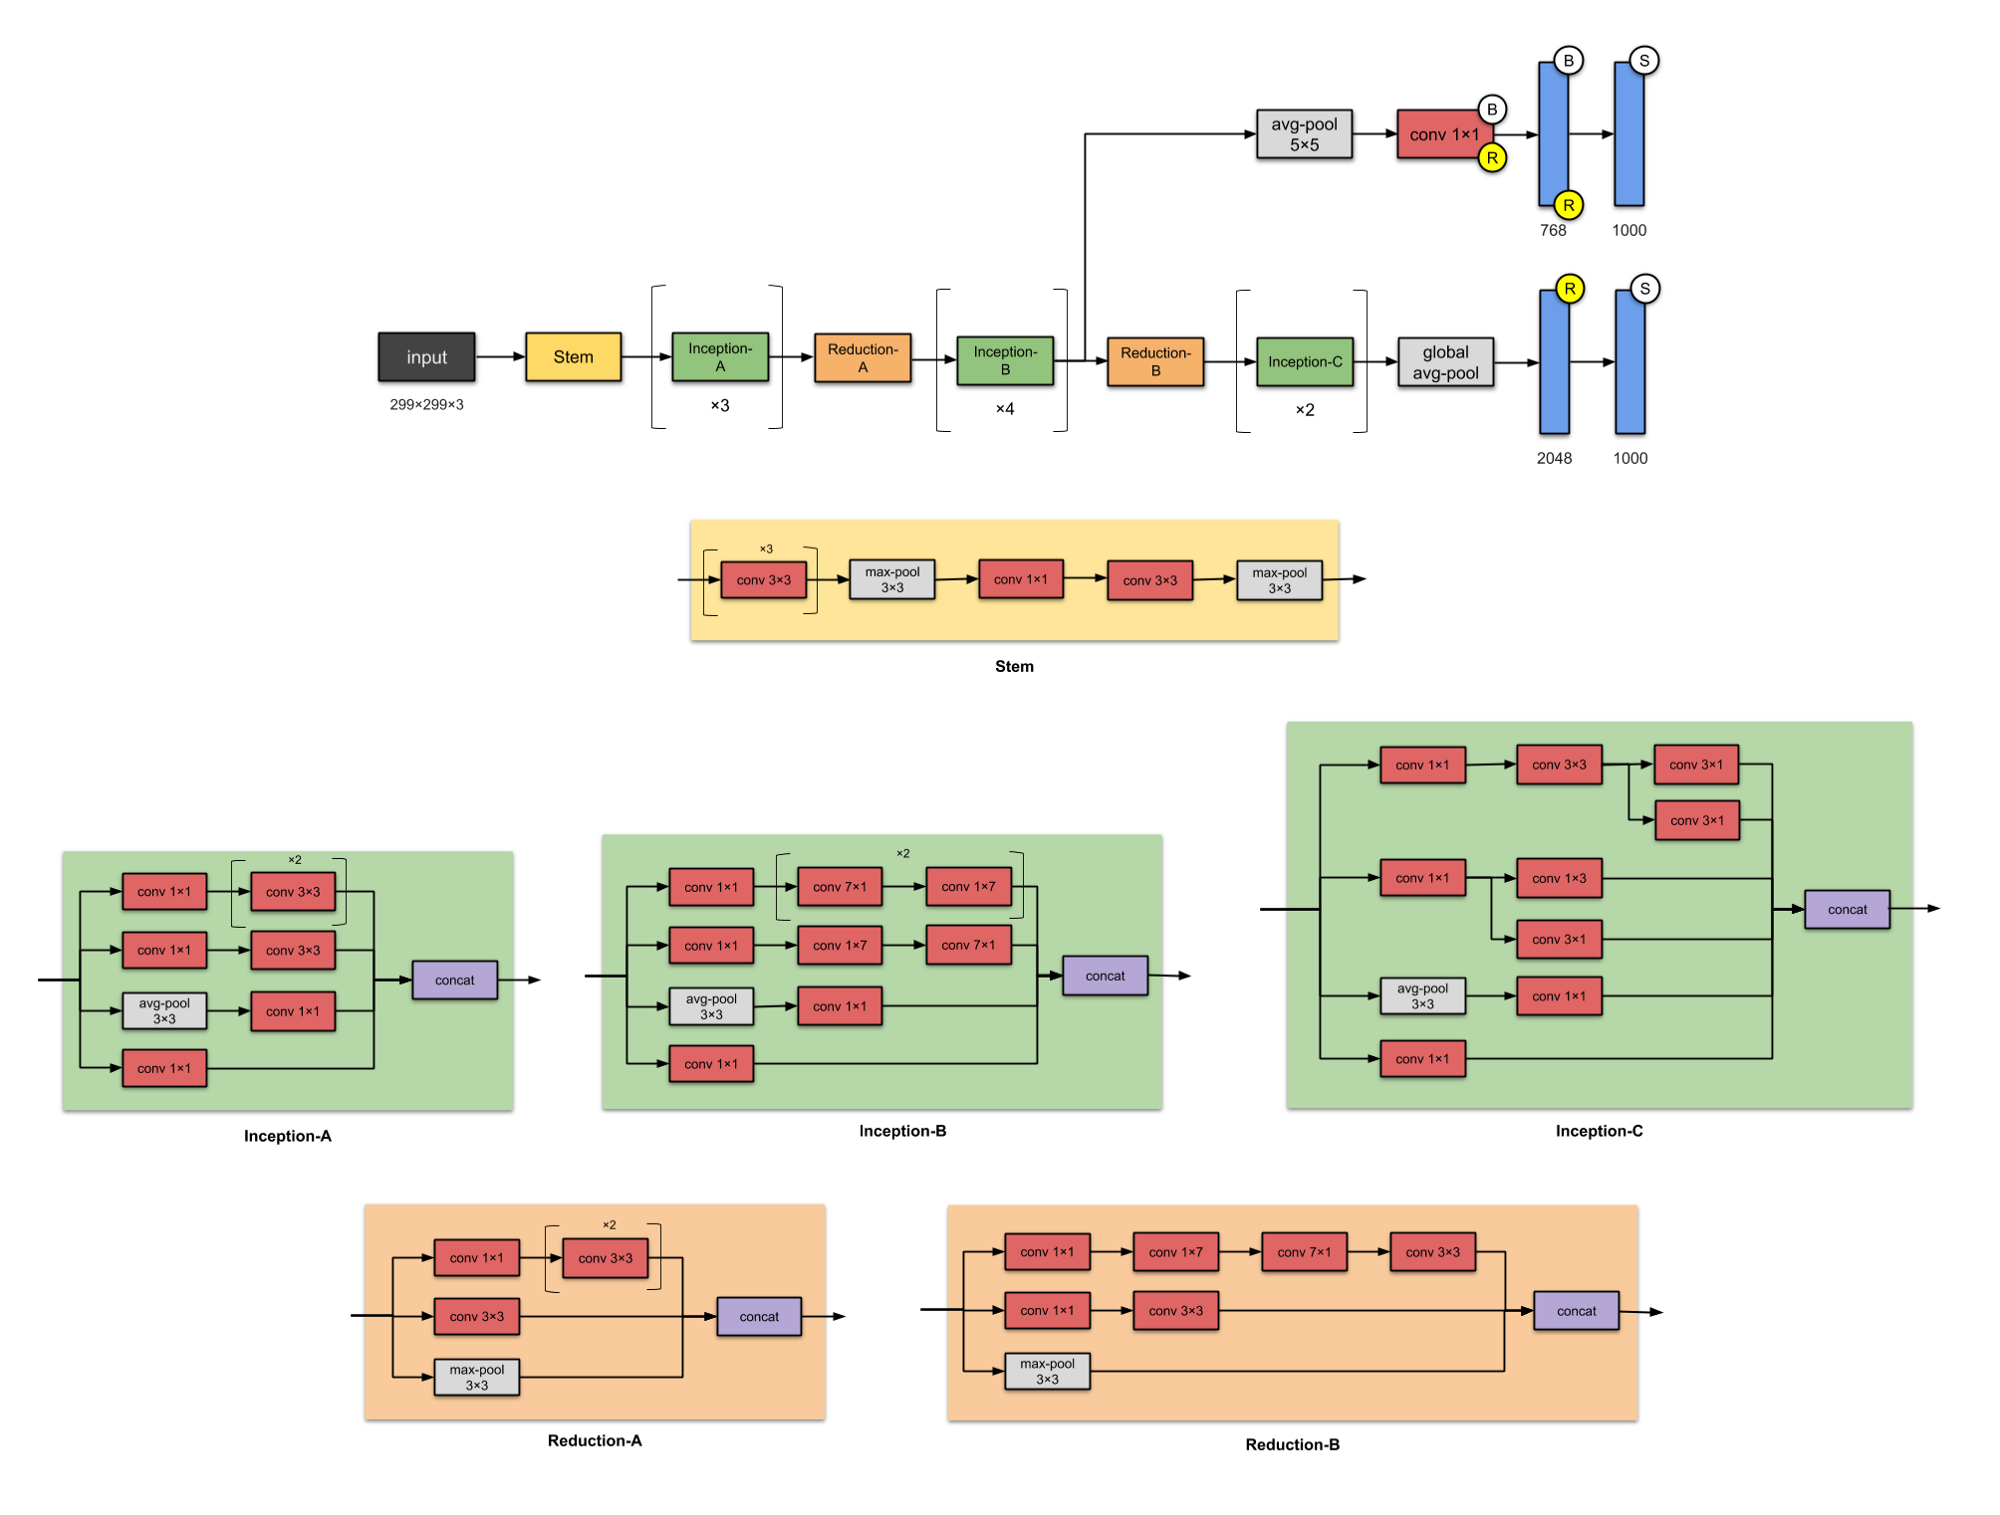

Parámetros: 24 millones.

Novedades: Factorizado de convoluciones.

## ResNet-50 (2015)

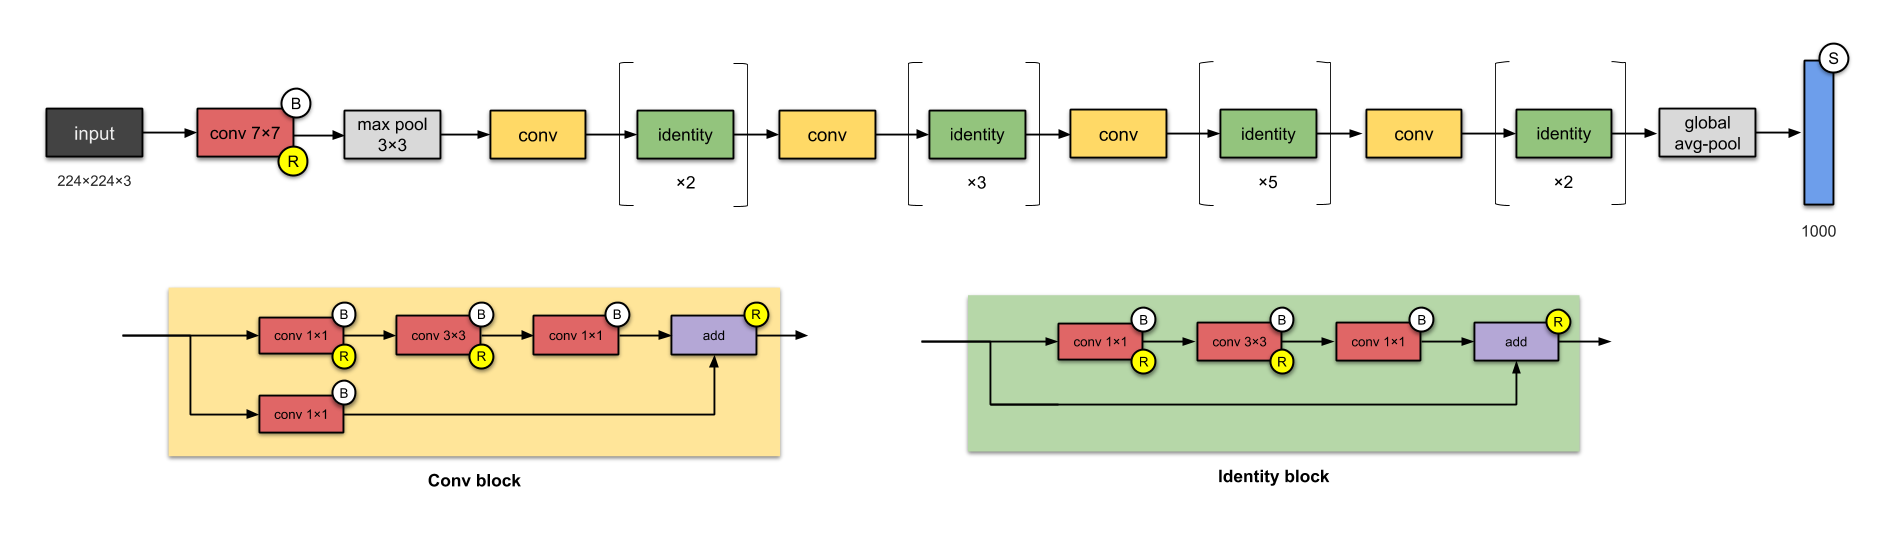

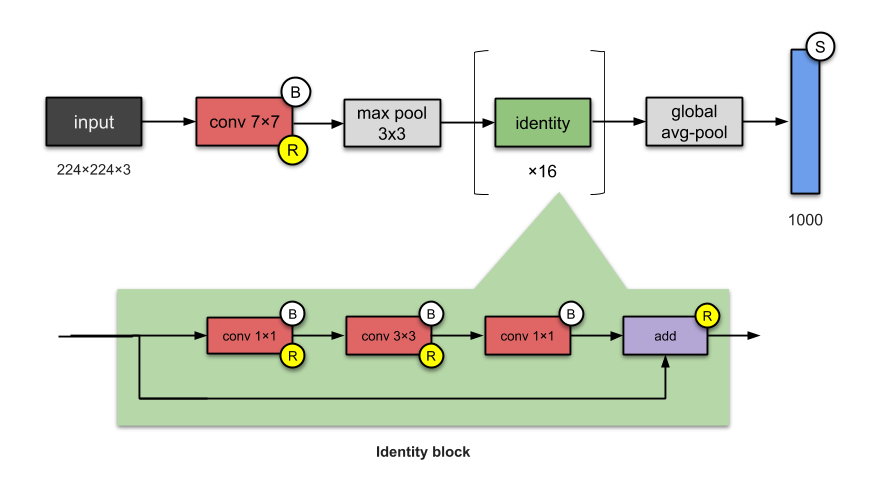

Parámetros: ResNet101 44 millones .

Novedades: Popularizó la conexiones actuales, logró 152 capas sin perder generalización, entre los primeros en usar batch normalización.

### Densenet

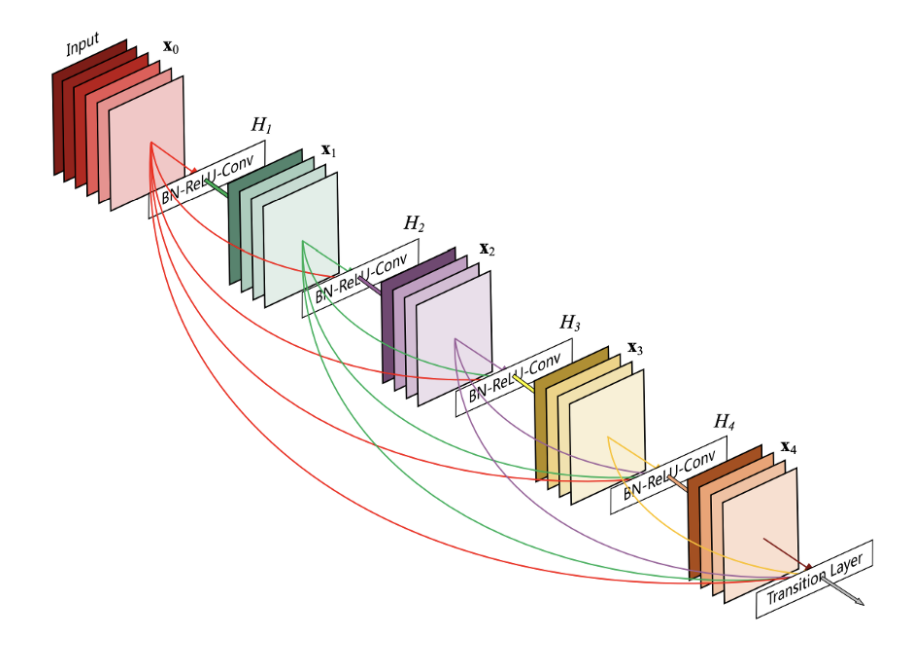

PArámetros: DenseNet-201 - 20 millones

Novedades: Menos parametros, ya que las conexiones tienen costos menores a poner más capas, ya no hay problema de poner cientos de capas ya que el gradiente permanece con magnitudes altas

## EfficientNet

Hay 8 versiones (B0-B7) que van de 237 a 813 capas!

Se basa en 5 módulos diferentes

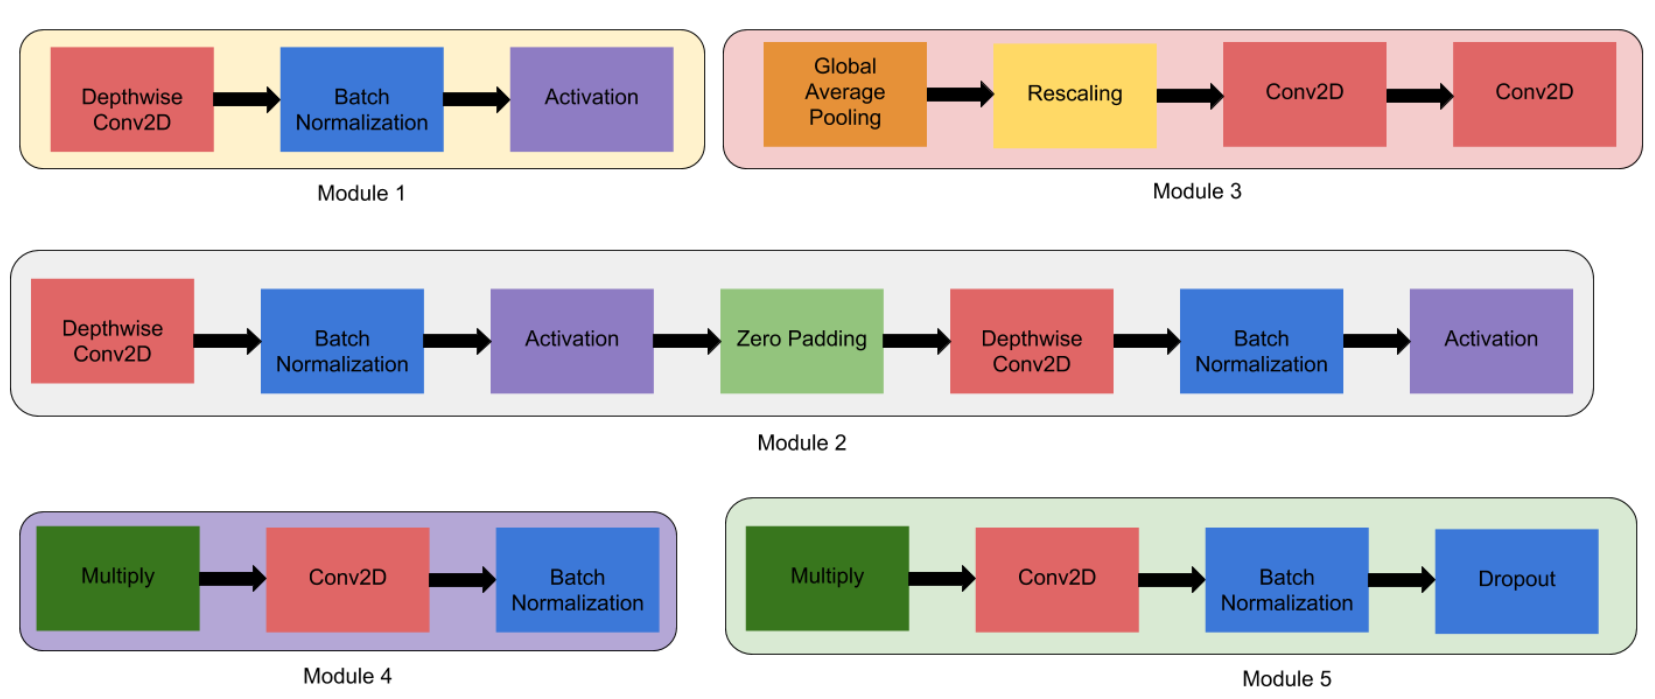

A su vez estos módulos formas subloques

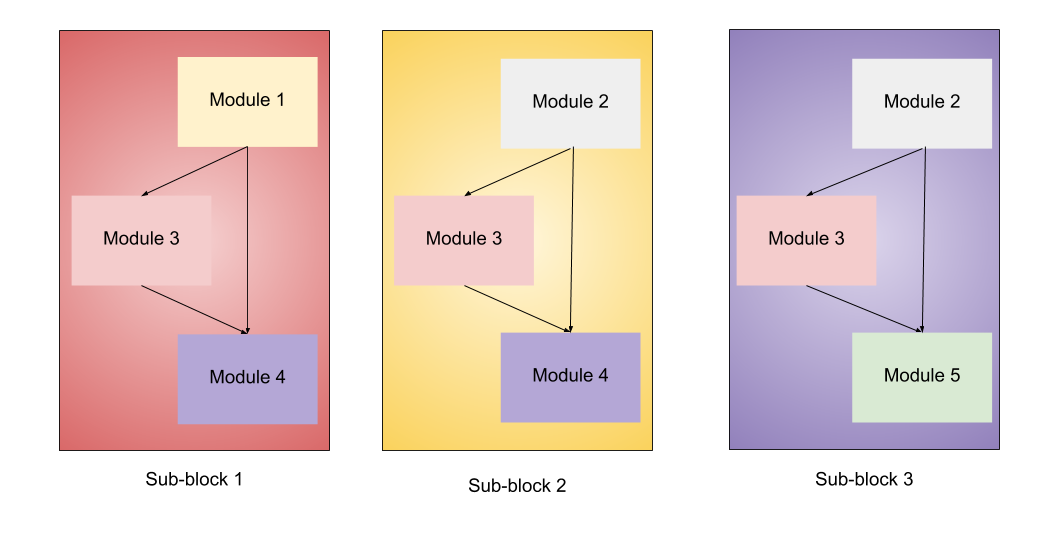

El diseño:

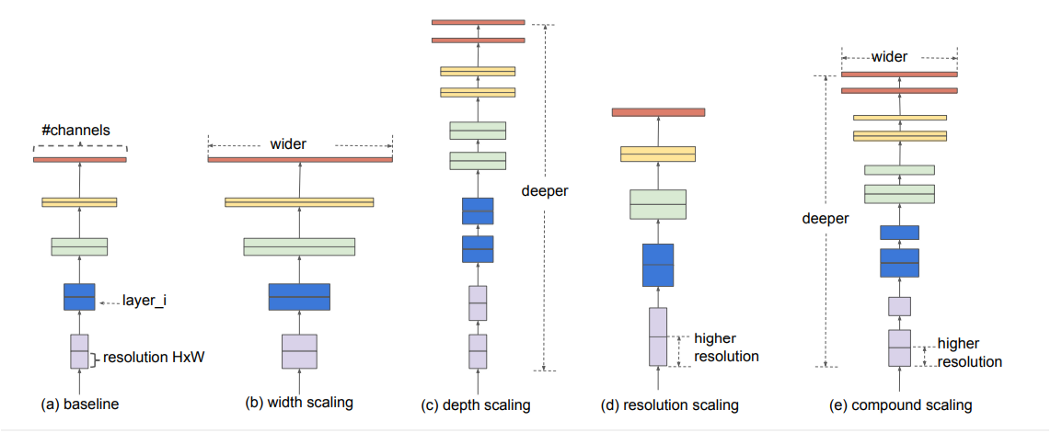

EfficientNet-B0:

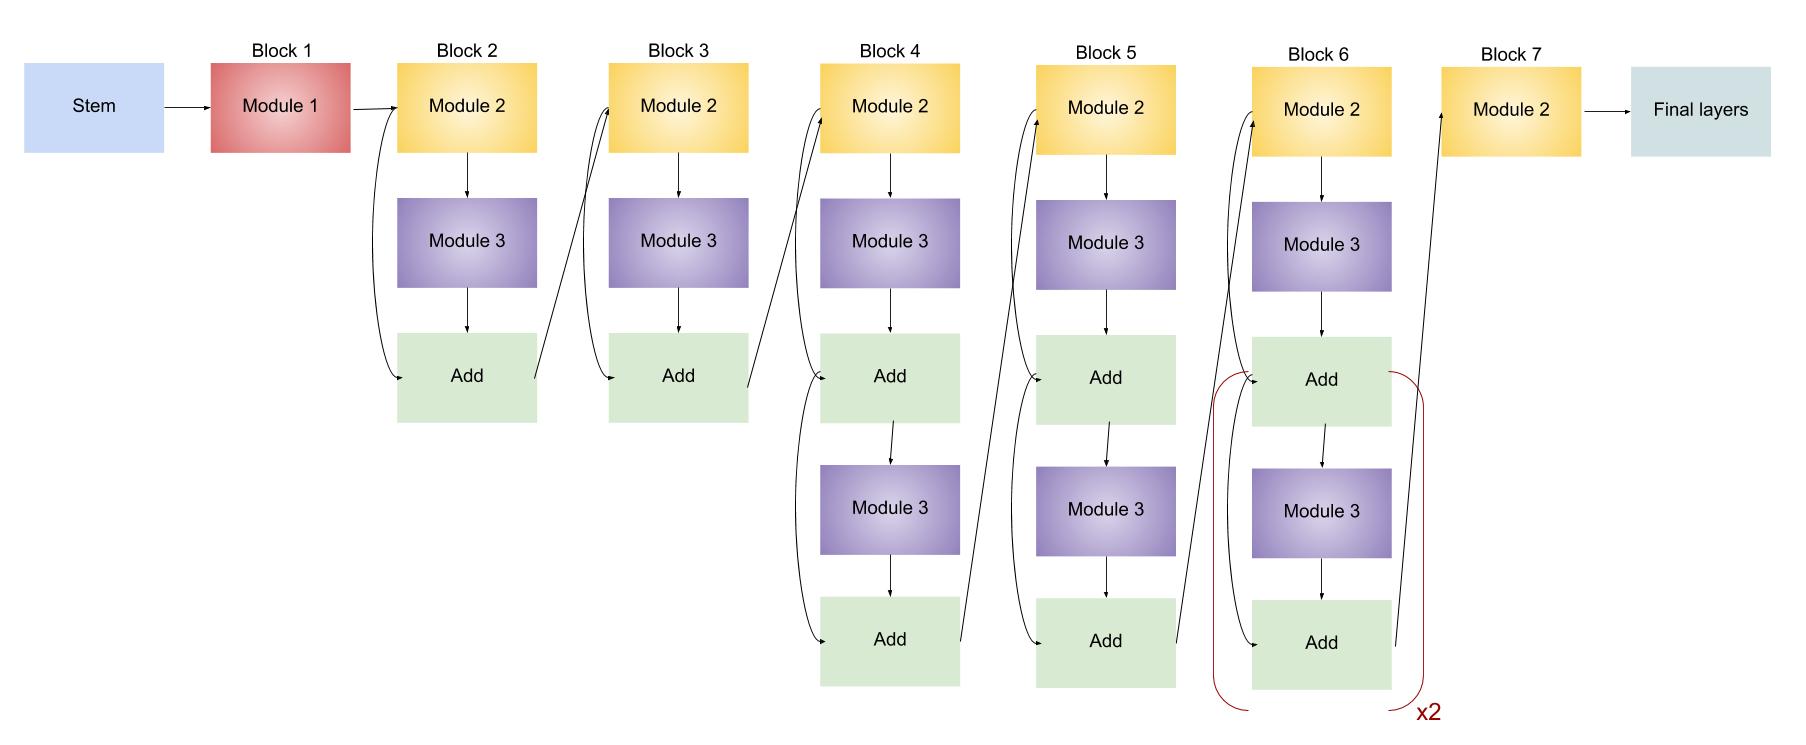

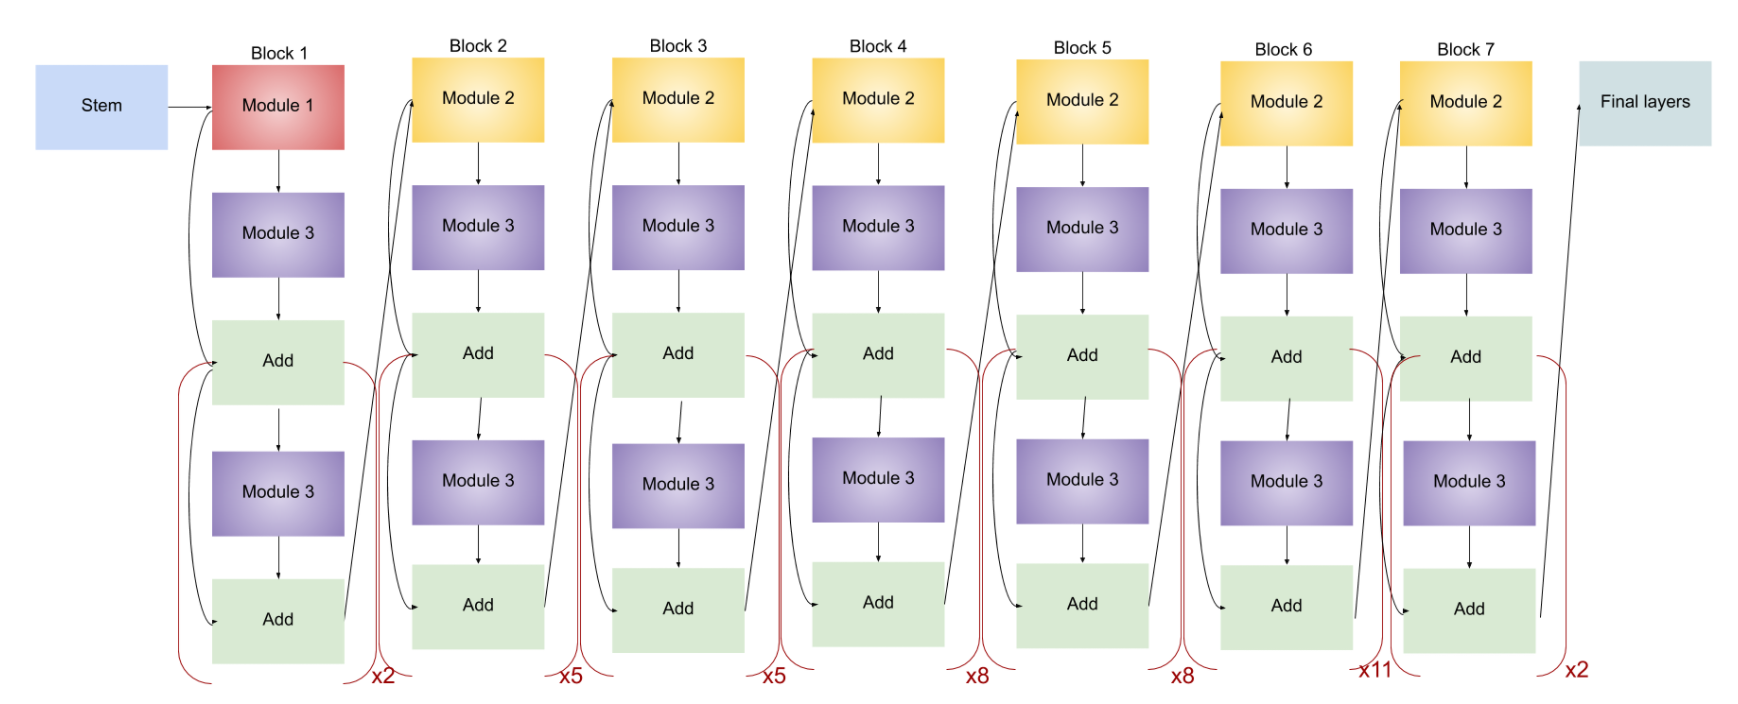

El tallo y las capas finales

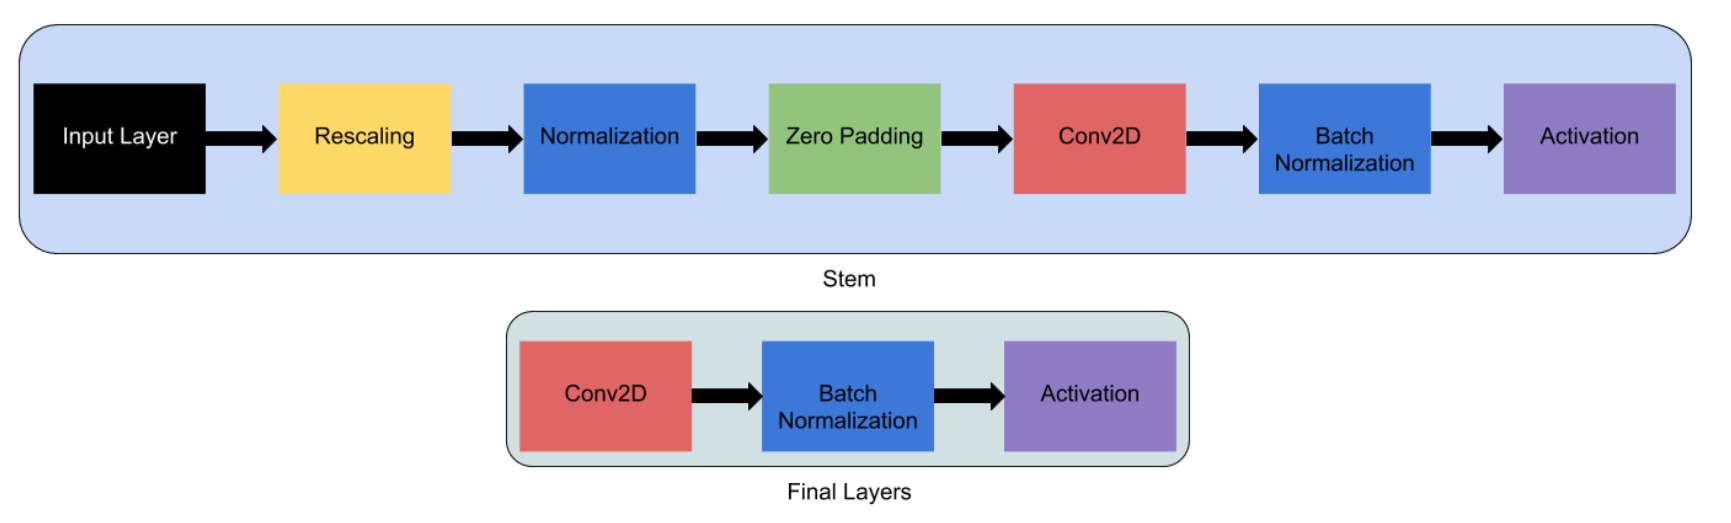

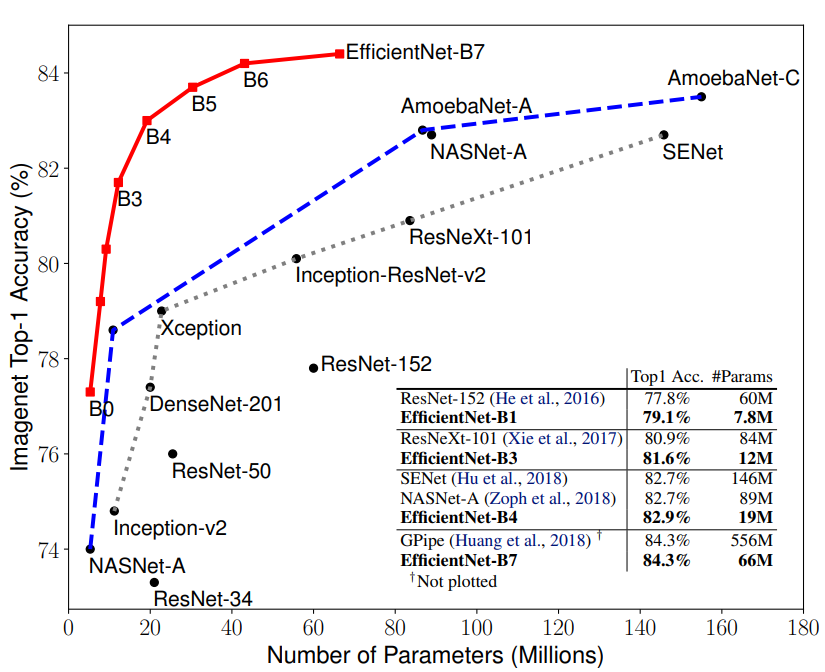

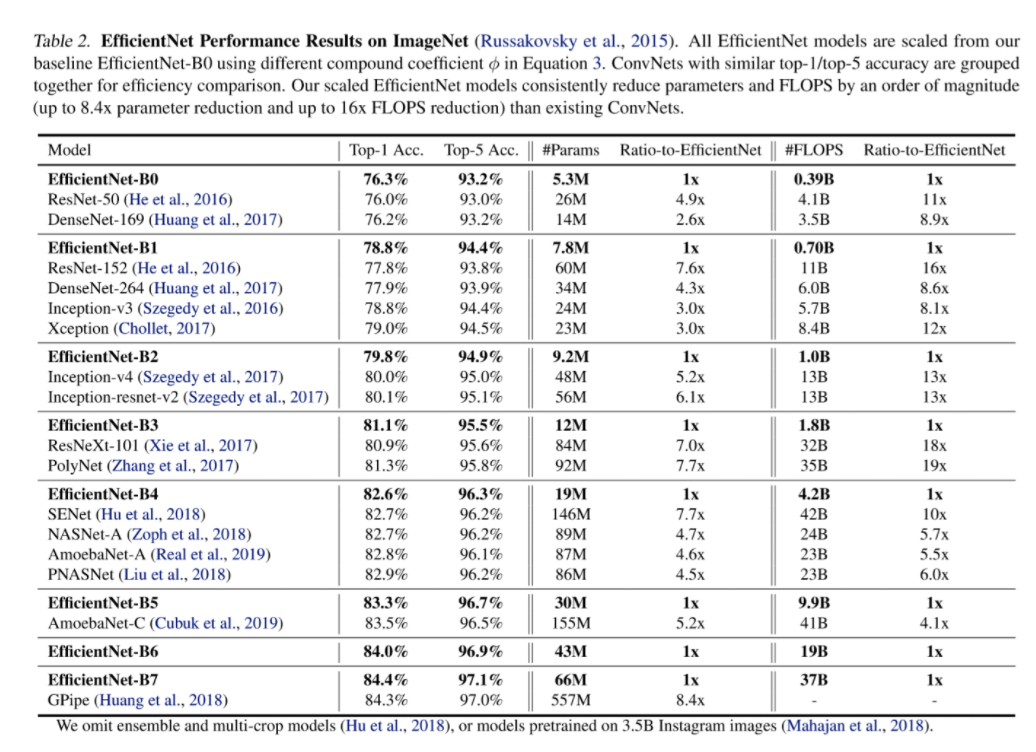

# ¿Cómo podemos acceder a esas redes en Keras?

https://keras.io/api/applications/

# Transferencia de aprendizaje (Transfer learning) y la puesta a punto (Fine-tuning)

El entrenamiento de una CNN desde cero es posible para proyectos pequeños, la mayoría de las aplicaciones requieren el entrenamiento de CNN muy grandes y esto requiere cantidades extremadamente grandes de datos procesados y potencia computacional.


*... el objetivo es aprovechar los datos del primer escenario para extraer información que pueda ser útil a la hora de aprender o incluso de hacer directamente predicciones en el segundo escenario.
Aunque el entrenamiento de una CNN desde cero es posible para proyectos pequeños, la mayoría de las aplicaciones requieren el entrenamiento de CNN muy grandes y esto, como has adivinado, requiere cantidades extremadamente grandes de datos procesados y potencia computacional. Y ambas cosas no se encuentran tan fácilmente hoy en día.* (Deep learning - Ian Goodfellow)


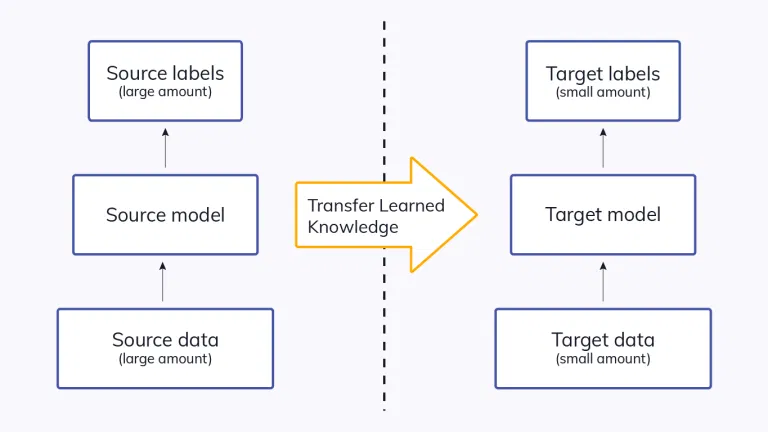

### Ventajas de la transferencia de aprendizaje

- No es necesario un conjunto de datos de entrenamiento grande.

- No se requiere mucha potencia de cálculo, ya que utilizamos pesos preentrenados y sólo tenemos que aprender los pesos de las últimas capas.

In [ ]:
import tensorflow

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Nov  3 20:12:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    24W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.applications import VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

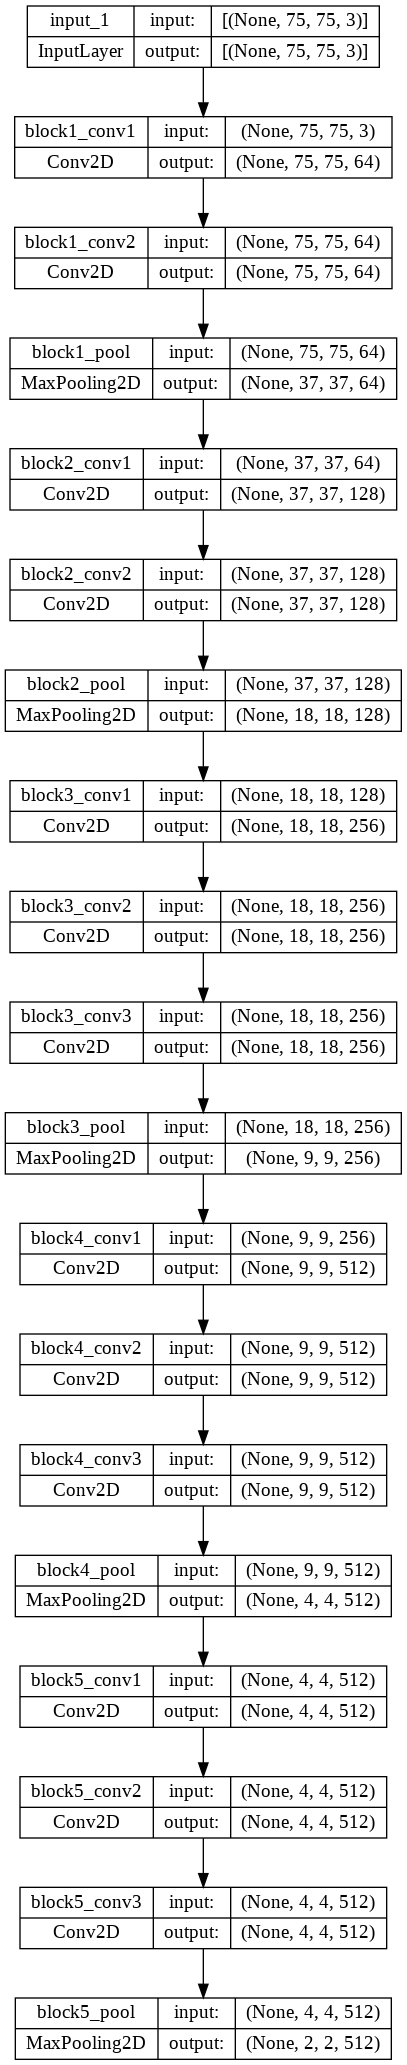

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(vgg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Podemos congelar partes de la red:

In [ ]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False


for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)



0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
vgg_model.layers[1].trainable = True

In [ ]:
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 True
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
vgg_model.layers[1].trainable = False

In [ ]:
vgg_model.layers[15].output

Agreguemos un top o clasificador

In [ ]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Flatten, Dense
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose, DepthwiseConv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras import optimizers
from keras.layers import BatchNormalization

In [ ]:
x = vgg_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dense(2, activation='softmax')(x)


In [ ]:
vgg_custom_model = Model(inputs=vgg_model.input, outputs=x)


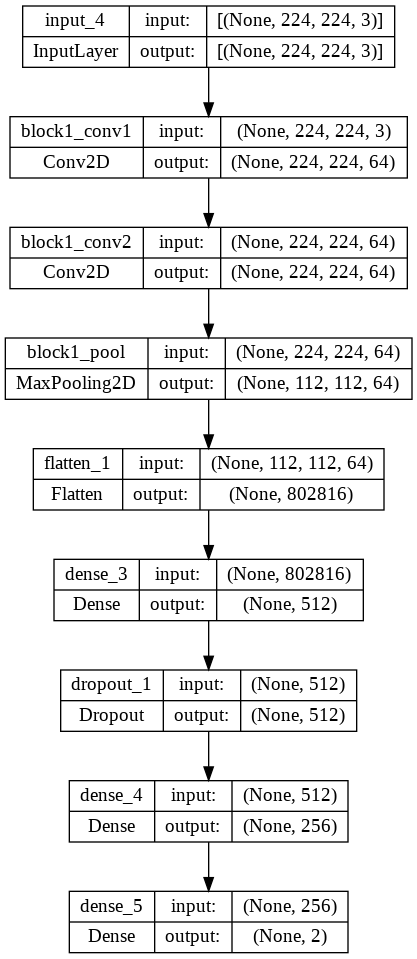

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(vgg_custom_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Carguemos nuestro conjunto de datos

In [ ]:
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

In [ ]:
!wget --no-check-certificate \
   https://www.dropbox.com/s/0j7s080efbfh8gc/cats_and_dogs_small.zip?dl=0\
   -O cats_and_dogs_small.zip

--2022-11-03 20:36:43--  https://www.dropbox.com/s/0j7s080efbfh8gc/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0j7s080efbfh8gc/cats_and_dogs_small.zip [following]
--2022-11-03 20:36:43--  https://www.dropbox.com/s/raw/0j7s080efbfh8gc/cats_and_dogs_small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3b609a94e364400f0375e63d58.dl.dropboxusercontent.com/cd/0/inline/BwHPToGA9k6Dyn-BpY9-l1KJFozoXn8Hq0PZyuaEv8ADs6Qls5dnKShCi4gLs3r6W3W0wLPZhN-sU9CQyfGq3NqtwkG8lLzJ6g60gWutBwou8ukkiZXIoZuPxVOnsYQNv1LS_UCIJYqJRKSUOc-QbOsCOCGEe0ASfcAzW4zvYkU4bg/file# [following]
--2022-11-03 20:36:44--  https://uc3b609a94e364400f0375e63d58.dl.dropboxusercontent.com/cd/0/inline/BwHPToGA9k6Dyn-BpY9-l1KJFozoXn8Hq0PZyuaEv

In [ ]:
import os
import zipfile

local_zip = 'cats_and_dogs_small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [ ]:
import h5py

with h5py.File(path_h5 + 'dataset_cat_dogs.hdf5', 'r') as hf:
    X = hf['X'][:]
    Y = hf['Y'][:]


In [ ]:
import tensorflow as tf

Y = tf.keras.utils.to_categorical(Y)
X = X.astype('float32')

X /= 255.0

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

Veamos algunas funciones avanzadas para ajustar el lr y guardar nuestro mejor modelo

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint =  ModelCheckpoint('vgg16_finetune.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
earlystopper = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 10, verbose = 1, restore_best_weights = True)

In [ ]:
learning_rate= 5e-5
vgg_custom_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=["accuracy"])


In [ ]:
history = vgg_custom_model.fit(X_train, y_train, batch_size = 16, epochs=50, validation_data=(X_test,y_test), callbacks=[lr_reduce, checkpoint, earlystopper])

## Ensambles de redes


Los ensambles se han estudiado por mucho tiempo, estos son los principales enfoques:

Algoritmos Bagging:

- Bagging meta-estimator

- Random forest


Algoritmos Boosting:

- AdaBoost

- GBM

- XGBM

- Light GBM

- CatBoost

Para variar no se sabe bien porque funcionan:

https://wandb.ai/authors/loss-landscape/reports/Understanding-the-Effectivity-of-Ensembles-in-Deep-Learning--VmlldzoxODAxNjA

Hay dos tipos prinicpales de enfoques:

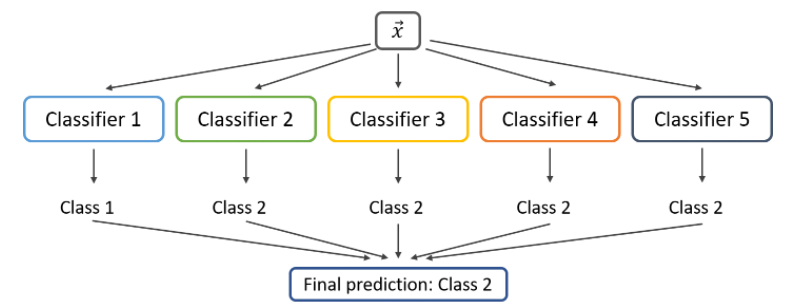

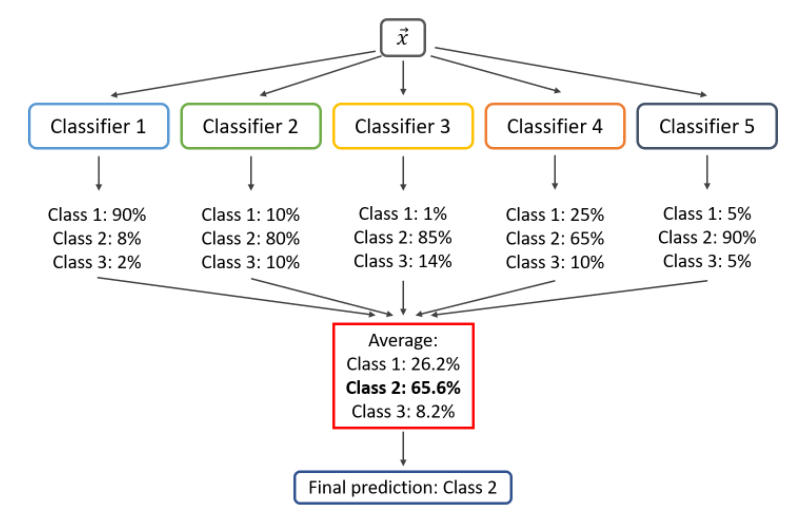

Pueden usar otro tipo de IA!

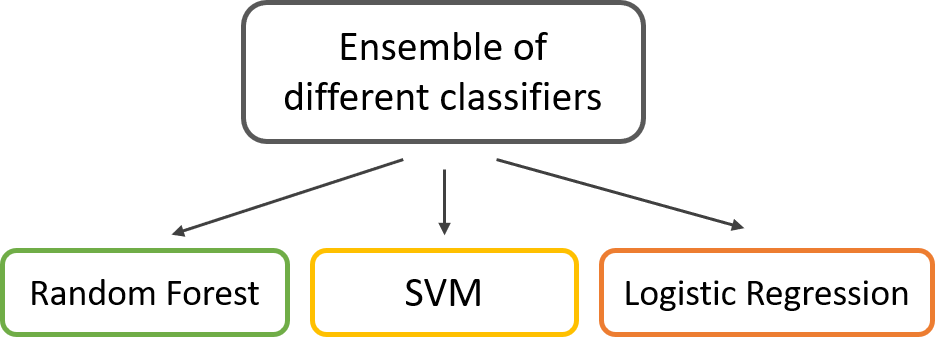

Hagamos un pequeño ejemplo:

Usemos Resnet 50:

In [ ]:
from tensorflow.keras.applications import ResNet50 
resnet50 = ResNet50(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(resnet50, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Usemos DenseNet

In [ ]:
from tensorflow.keras.applications import DenseNet121  
densenet121 = DenseNet121(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

In [ ]:
plot_model(densenet121, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average



models = [resnet50, densenet121]

model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensamble1')

In [ ]:
plot_model(ensemble_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(ensemble_model.summary)